http://qiita.com/cvusk/items/aa6270301ff2d14fb989

In [1]:
# coding: utf-8

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils


import matplotlib.pyplot as plt
%matplotlib inline
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')




Using TensorFlow backend.


In [2]:
from keras.preprocessing import image

BATCH_SIZE = 4
PATH="data/"

def get_fit_sample():
    gen = image.ImageDataGenerator()
    sample_batches = gen.flow_from_directory(PATH+'valid', target_size=(32,32), 
            class_mode='categorical', shuffle=False, batch_size=300)
    imgs, labels = next(sample_batches)
    return imgs

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
val_batches = gen.flow_from_directory(PATH+'valid', target_size=(32,32), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
batches = gen.flow_from_directory(PATH+'train', target_size=(32,32), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

#x , y = next(batches)
#plots(x)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 16997 images belonging to 2 classes.


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [4]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [6]:
%%time
h = model.fit_generator(batches,  steps_per_epoch=1000, epochs=25, validation_data=val_batches, validation_steps=100)            
model.save('vgg16.h5')

Epoch 1/25
1000/1000 [==============================] - 4s - loss: 0.6911 - acc: 0.5320 - val_loss: 0.6841 - val_acc: 0.5650
Epoch 2/25
1000/1000 [==============================] - 4s - loss: 0.6844 - acc: 0.5413 - val_loss: 0.6918 - val_acc: 0.5375
Epoch 3/25
1000/1000 [==============================] - 4s - loss: 0.6795 - acc: 0.5640 - val_loss: 0.6683 - val_acc: 0.6450
Epoch 4/25
1000/1000 [==============================] - 4s - loss: 0.6788 - acc: 0.5830 - val_loss: 0.6855 - val_acc: 0.5300
Epoch 5/25
1000/1000 [==============================] - 4s - loss: 0.6730 - acc: 0.5837 - val_loss: 0.6881 - val_acc: 0.5875
Epoch 6/25
1000/1000 [==============================] - 4s - loss: 0.6523 - acc: 0.6210 - val_loss: 0.6408 - val_acc: 0.6375
Epoch 7/25
1000/1000 [==============================] - 4s - loss: 0.6532 - acc: 0.6180 - val_loss: 0.6418 - val_acc: 0.6325
Epoch 8/25
1000/1000 [==============================] - 4s - loss: 0.6558 - acc: 0.6180 - val_loss: 0.6352 - val_acc: 0.6650


In [5]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 9568/10000 [===========================>..] - ETA: 0sTest loss: 0.665917389059
Test accuracy: 0.7927


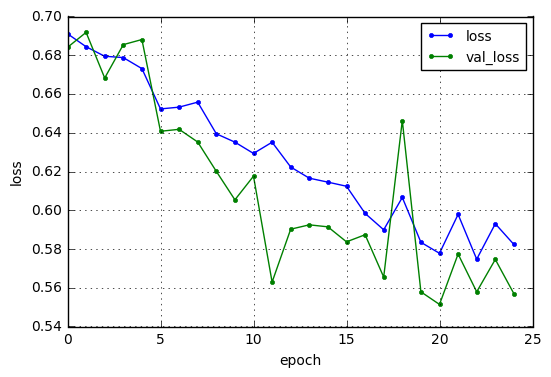

In [8]:
model.save('sample1.h5')
# http://qiita.com/TypeNULL/items/4e4d7de11ab4361d6085
loss = h.history['loss']
val_loss = h.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()